<a href="https://colab.research.google.com/github/davidriveraarbelaez/IA_Explorador/blob/main/ejercicio_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load tips dataset
taxis = sns.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [ ]:
taxis['total'].describe()

,total
count,6433.000000
mean,18.517794
std,13.815570
min,1.300000
25%,10.800000
50%,14.160000
75%,20.300000
max,174.820000


Text(0.5, 0, 'Total paid per trip')

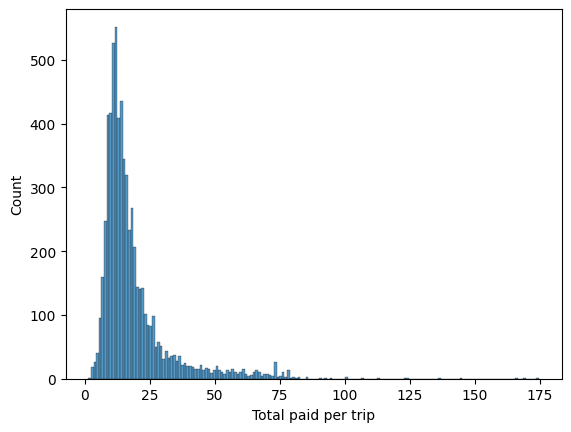

In [ ]:
# Create a histogram using Seaborn
g = sns.histplot(data = taxis, x = 'total')
# Add labels
g.set_xlabel('Total paid per trip')

Text(0.5, 0, 'Total paid per trip')

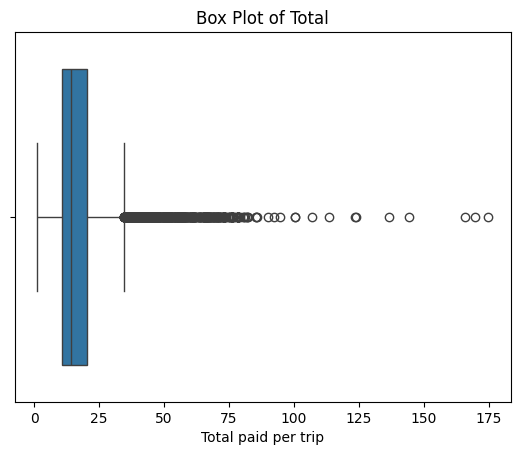

In [ ]:
# Create a box plot
g = sns.boxplot(data = taxis, x = 'total')

# Add a title and change xlabel
g.set_title('Box Plot of Total')
g.set_xlabel('Total paid per trip')

In [ ]:
# Import zscore function
from scipy.stats import zscore

# Calculate z-score for each data point and compute its absolute value
z_scores = zscore(taxis['total'])
abs_z_scores = np.abs(z_scores)

# Select the outliers using a threshold of 3
outliers = taxis[abs_z_scores > 3]
outliers.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
56,2019-03-05 17:57:00,2019-03-05 18:45:25,2,19.59,52.0,0.00,5.76,65.56,yellow,credit card,JFK Airport,Upper East Side North,Queens,Manhattan
162,2019-03-06 17:36:48,2019-03-06 18:43:39,2,17.10,52.0,13.10,5.76,78.66,yellow,credit card,Midtown South,JFK Airport,Manhattan,Queens
188,2019-03-26 15:06:47,2019-03-26 15:59:52,1,18.41,52.0,0.02,5.76,61.08,yellow,credit card,JFK Airport,Midtown Center,Queens,Manhattan
225,2019-03-22 15:36:34,2019-03-22 16:34:48,2,12.07,48.5,11.51,5.76,69.07,yellow,credit card,Manhattan Valley,Boerum Hill,Manhattan,Brooklyn


In [ ]:
# Obtain number of outliers
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 185


In [ ]:
# Import the median_abs_deviation function
from scipy.stats import median_abs_deviation

# Obtain the MAD value
mad_score = median_abs_deviation(taxis['total'])
mad_score



4.199999999999999

In [ ]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=226e9706416406793914c158af8e8604e59a9d454b6c387ac353a8f123e1a279
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [ ]:
# Import MAD estimator
from pyod.models.mad import MAD

# Set threshold to 3.5
mad = MAD(threshold = 3.5)

# Convert the 'total' column into a 2D numpy array
total_reshaped = taxis['total'].values.reshape(-1, 1)

# Generate inline and outlier labels
labels = mad.fit(total_reshaped).labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Obtain number of outliers
print(f'Number of outliers: {labels.sum()}')

Number of outliers: 560


In [ ]:
outliers = taxis[labels == 1]
outliers.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.00,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
22,2019-03-28 17:20:54,2019-03-28 17:55:57,1,9.82,31.5,8.31,5.76,49.87,yellow,credit card,LaGuardia Airport,Sutton Place/Turtle Bay North,Queens,Manhattan
40,2019-03-07 15:15:46,2019-03-07 15:50:14,1,7.51,27.0,6.06,0.00,36.36,yellow,credit card,Flatiron,Carroll Gardens,Manhattan,Brooklyn
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
53,2019-03-20 18:49:24,2019-03-20 19:12:40,1,13.45,36.0,0.00,0.00,37.80,yellow,cash,JFK Airport,Sunnyside,Queens,Queens


In [ ]:
# Calculate the percentiles
seventy_fifth = taxis['total'].quantile(0.75)
twenty_fifth = taxis['total'].quantile(0.25)

# Obtain IQR
iqr = seventy_fifth - twenty_fifth

# Upper and lower thresholds
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Subset the dataset
outliers = taxis[(taxis['total'] < lower) | (taxis['total'] > upper)]
outliers.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.00,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
22,2019-03-28 17:20:54,2019-03-28 17:55:57,1,9.82,31.5,8.31,5.76,49.87,yellow,credit card,LaGuardia Airport,Sutton Place/Turtle Bay North,Queens,Manhattan
40,2019-03-07 15:15:46,2019-03-07 15:50:14,1,7.51,27.0,6.06,0.00,36.36,yellow,credit card,Flatiron,Carroll Gardens,Manhattan,Brooklyn
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
43,2019-03-27 19:39:16,2019-03-27 20:00:26,1,9.50,28.0,0.00,5.76,35.06,yellow,cash,LaGuardia Airport,Washington Heights South,Queens,Manhattan


In [ ]:
# Obtain number of outliers
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 600


In [ ]:
taxis_filtered = taxis.copy()
taxis_filtered = taxis_filtered[labels == 0]

In [ ]:
# Calculate the median
median_value = taxis['total'].median()

# Impute outliers with the median
taxis_imputed = taxis.copy()
taxis_imputed.loc[outliers.index, 'total'] = median_value

In [ ]:
from scipy.stats.mstats import winsorize

taxis_winsorized = taxis.copy()
taxis_winsorized['Total'] = winsorize(taxis_winsorized['total'],\
  limits = [0.05, 0.05], inplace = True)